In [14]:
import numpy as np 
import matplotlib.pyplot as plt 

In [84]:
a = [] 
for l in open("test.txt","r").readlines()[1:]: 
    a.append([float(x) for x in l.split(",")[:-1]])
arr = np.array(a)

In [85]:
arr[0]

array([ 7.49979e-05,  9.99972e-04,  0.00000e+00, -9.99972e-04,
        0.00000e+00, -5.00000e-02,  0.00000e+00,  5.00000e-02,
        0.00000e+00])

In [86]:
len(arr[0])

9

(-0.07, 0.07)

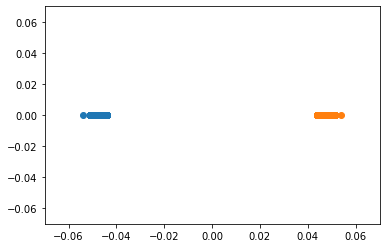

In [87]:
plt.scatter(arr[:,5],arr[:,6])
plt.scatter(arr[:,7],arr[:,8])
plt.xlim(-0.07,0.07); plt.ylim(-0.07,0.07)

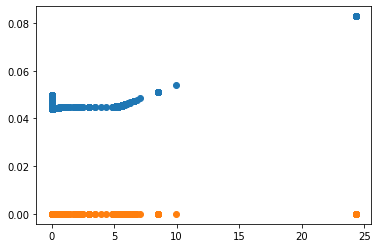

In [88]:
plt.scatter(arr[:,0],arr[:,7])
plt.scatter(arr[:,0],arr[:,8])

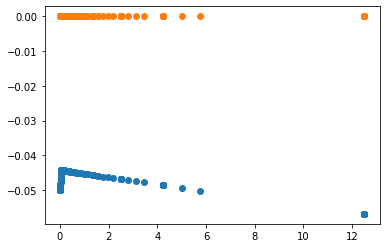

In [83]:
plt.scatter(arr[:,0],arr[:,5])
plt.scatter(arr[:,0],arr[:,6])

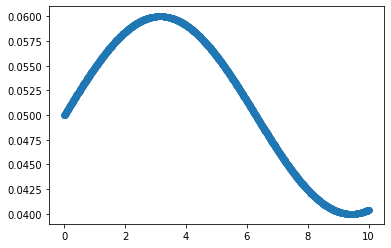

In [71]:
ttest = np.linspace(0,10,1000)
plt.scatter(ttest,0.05 + np.sin(ttest/2.0)*0.01)

In [36]:
plt.scatter(arr[:,9],arr[:,10])
plt.scatter(arr[:,11],arr[:,12])
plt.scatter(arr[:,13],arr[:,14])
plt.scatter(arr[:,15],arr[:,16])

IndexError: index 9 is out of bounds for axis 1 with size 9

In [37]:
plt.scatter(arr[:,0],arr[:,15])

IndexError: index 15 is out of bounds for axis 1 with size 9

In [310]:
len(arr[:,0])

1023

In [309]:
max(arr[:,0])

17.5667

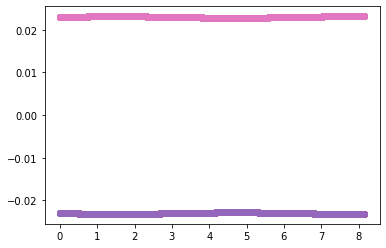

In [246]:
[plt.scatter(arr[:,0],arr[:,i]) for i in range(9,16)]

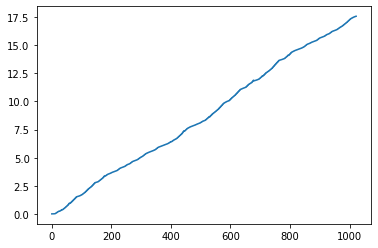

In [308]:
plt.plot(arr[:,0])